<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/Clase_7/Scikit_learn_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
# Cargar los datos
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# ajustar arbol de decisión simple con hiperparametros (defecto)
clf = DecisionTreeClassifier(random_state=42)
model = clf.fit(X, y)


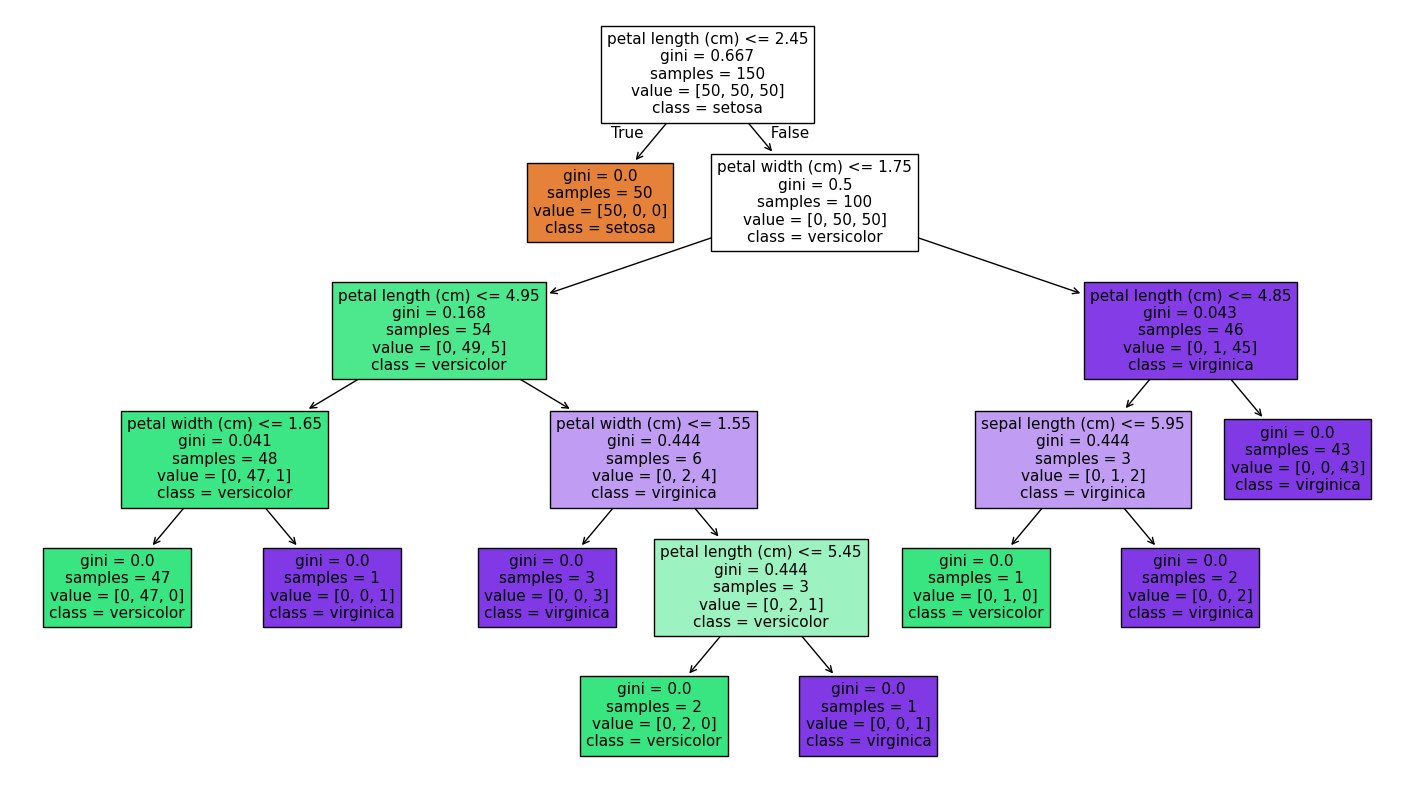

In [ ]:
# Graficando
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(clf,feature_names=iris.feature_names,
                  class_names=iris.target_names,
                  filled=True)


In [ ]:
!pip install dtreeviz

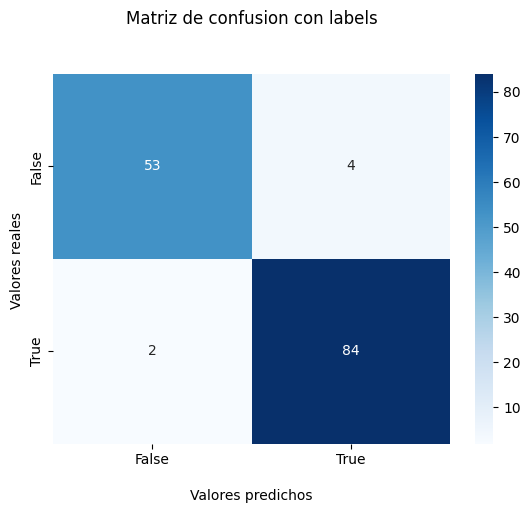

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression


X, y = load_breast_cancer(return_X_y=True)

# Separacion train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression(max_iter=10000, n_jobs=-1)

# Ajustar modelo
model.fit(X_train, y_train)

#Predicciones
predicciones = model.predict(X_test)


from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, predicciones)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
from google.colab import drive
import pandas as pd
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
print("Definiendo los simbolos de stock")
symbol_data_to_load = ['D','EXC','NEE','SO','DUK']
list_of_df = []

# Ciclo sobre simbolos

#llenar la lista de dataframes
print(" --- Inicio de Loop --- ")
for i in symbol_data_to_load:
    print("Procesando Simbolo: " + i)
    temp_df = pd.read_csv('/content/gdrive/MyDrive/Data Science 1 curso/Clase 6/'+i+'.csv',sep=',')
    temp_df['Volume_Millions'] = temp_df['Volume'] / 1000000.0
    temp_df['Symbol'] = i # Agregar nueva columna con el simbolo
    list_of_df.append(temp_df)

print(" --- Completado loop simbolos --- ")

# Combinar en un Dataframe unico usando concat
#permite pegar los dataframes de la lista
print("Agregando la data")
agg_df = pd.concat(list_of_df, axis=0)

# Agregar estadisticas de retorno y volatilidad
# es mas rápido agregarlo al dataframe que a cada uno de los registros
print('Calculando estadisticas finales')
agg_df['VolStat'] = (agg_df['High'] - agg_df['Low']) / agg_df['Open']
agg_df['Return'] = (agg_df['Close'] / agg_df['Open']) - 1.0

print("agg_df DataFrame dimension (filas, columnas): ")
print(agg_df.shape)

print("Head del DataFrame agg_df: ")
agg_df.head()

df = agg_df.copy()

#print("agg_df['Symbol'].unique()")

Definiendo los simbolos de stock
 --- Inicio de Loop --- 
Procesando Simbolo: D
Procesando Simbolo: EXC
Procesando Simbolo: NEE
Procesando Simbolo: SO
Procesando Simbolo: DUK
 --- Completado loop simbolos --- 
Agregando la data
Calculando estadisticas finales
agg_df DataFrame dimension (filas, columnas): 
(6295, 11)
Head del DataFrame agg_df: 


In [ ]:
# Modelo 1: Regresión para Volatilidad Relativa (VolStat)

# 1. Definir Variables Independientes (X) y Dependiente (y1)
features = ['Open', 'High', 'Low', 'Close', 'Volume_Millions', 'Symbol']
target1 = 'VolStat'

In [ ]:
X = df[features]
y1 = df[target1]

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Volume_Millions,0
Symbol,0
VolStat,0


In [ ]:
# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas")

Tamaño del conjunto de entrenamiento: 5036 filas
Tamaño del conjunto de prueba: 1259 filas


In [ ]:
# 3. Preprocesamiento (Codificación One-Hot para 'Symbol' y Escalado para numéricas)
# Identificar columnas numéricas y categóricas
numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume_Millions']
categorical_features = ['Symbol']

In [ ]:
# Crear el preprocesador
# OneHotEncoder manejará nuevas categorías en test (handle_unknown='ignore')
# StandardScaler escalará las características numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Mantiene otras columnas si las hubiera (aunque no hay en este caso)
)

In [ ]:
# 4. Crear el Pipeline del Modelo
model1 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

In [ ]:
# 5. Entrenar el Modelo
model1.fit(X_train, y1_train)
print("Modelo 1 entrenado.")

Modelo 1 entrenado.


In [ ]:
# 6. Evaluar el Modelo
print("\nEvaluando Modelo 1...")
y1_pred = model1.predict(X_test)


Evaluando Modelo 1...


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae1 = mean_absolute_error(y1_test, y1_pred)
mse1 = mean_squared_error(y1_test, y1_pred)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y1_test, y1_pred)

In [ ]:
print(f"Modelo 1 (Volatilidad Relativa - VolStat):")
print(f"  Error Absoluto Medio (MAE): {mae1:.6f}")
print(f"  Error Cuadrático Medio (MSE): {mse1:.6f}")
print(f"  Raíz del Error Cuadrático Medio (RMSE): {rmse1:.6f}")
print(f"  Coeficiente de Determinación (R²): {r2_1:.4f}")

Modelo 1 (Volatilidad Relativa - VolStat):
  Error Absoluto Medio (MAE): 0.001844
  Error Cuadrático Medio (MSE): 0.000009
  Raíz del Error Cuadrático Medio (RMSE): 0.002929
  Coeficiente de Determinación (R²): 0.8578


In [ ]:
# --- Modelo 2: Regresión para Índice de Retorno (Return) ---

print("\n--- Construyendo Modelo 2: Predicción de Índice de Retorno ---")

# 1. Definir Variables Independientes (X) y Dependiente (y2)
# X es el mismo que en el Modelo 1
target2 = 'Return'


--- Construyendo Modelo 2: Predicción de Índice de Retorno ---


In [ ]:
y2 = df[target2]

In [ ]:
# 2. Dividir los datos
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42) # Re-split con y2
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} filas")

Tamaño del conjunto de entrenamiento: 5036 filas
Tamaño del conjunto de prueba: 1259 filas


In [ ]:
# 3. Preprocesamiento (Ya definido en 'preprocessor')

# 4. Crear el Pipeline del Modelo
model2 = Pipeline(steps=[('preprocessor', preprocessor), # Reutilizar el mismo preprocesador
                           ('regressor', LinearRegression())])

In [ ]:
model2.fit(X_train, y2_train)
print("Modelo 2 entrenado.")

Modelo 2 entrenado.


In [ ]:
# 6. Evaluar el Modelo
print("\nEvaluando Modelo 2...")
y2_pred = model2.predict(X_test)


Evaluando Modelo 2...


In [ ]:
mae2 = mean_absolute_error(y2_test, y2_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y2_test, y2_pred)

In [ ]:
print(f"Modelo 2 (Índice de Retorno - Return):")
print(f"  Error Absoluto Medio (MAE): {mae2:.6f}")
print(f"  Error Cuadrático Medio (MSE): {mse2:.6f}")
print(f"  Raíz del Error Cuadrático Medio (RMSE): {rmse2:.6f}")
print(f"  Coeficiente de Determinación (R²): {r2_2:.4f}")

Modelo 2 (Índice de Retorno - Return):
  Error Absoluto Medio (MAE): 0.002763
  Error Cuadrático Medio (MSE): 0.000020
  Raíz del Error Cuadrático Medio (RMSE): 0.004523
  Coeficiente de Determinación (R²): 0.7948


# Clase de Introducción a Scikit-learn

* `Objetivo:` Familiarizarse con la librería Scikit-learn, sus principales componentes y cómo utilizarla para tareas básicas de Machine Learning como clasificación y regresión, incluyendo preprocesamiento de datos y evaluación de modelos.
* `Requisitos previos:` Conocimientos básicos de Python, NumPy y Pandas.

# 1. ¿Qué es Scikit-learn?

* Scikit-learn (o sklearn) es una de las librerías más populares y potentes para Machine Learning en Python. Proporciona herramientas eficientes para:


* Clasificación: Identificar a qué categoría pertenece un objeto. (Ej: Spam o no spam, tipo de flor)
* Regresión: Predecir un valor numérico continuo. (Ej: Precio de una casa, temperatura)
* Clustering: Agrupar automáticamente objetos similares en conjuntos. (Ej: Segmentación de clientes)
* Reducción de dimensionalidad: Reducir el número de variables (features) a considerar.
* Selección de modelos: Comparar, validar y elegir parámetros y modelos.
* Preprocesamiento de datos: Transformar y limpiar datos (Ej: Escalado, codificación de variables categóricas).

Filosofía de Scikit-learn:

* API Consistente: Todos los objetos comparten una interfaz simple y coherente (Estimadores, fit, predict, transform).
* Integración: Construida sobre NumPy, SciPy y Matplotlib. Funciona muy bien con Pandas.
* Eficiencia: Optimizada para rendimiento, con partes críticas escritas en Cython o C.
* Accesibilidad: Código abierto y reutilizable comercialmente (licencia BSD).
* Buena Documentación: Extensa documentación y ejemplos.

## 2. Configuración Inicial

In [ ]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clases y funciones de Scikit-learn que usaremos
from sklearn.model_selection import train_test_split # Para dividir datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder # Para preprocesamiento
from sklearn.linear_model import LinearRegression, LogisticRegression # Modelos
from sklearn.neighbors import KNeighborsClassifier # Otro modelo de clasificación
from sklearn.tree import DecisionTreeClassifier # Otro modelo más
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Métricas para clasificación
from sklearn.metrics import mean_squared_error, r2_score # Métricas para regresión
from sklearn.datasets import load_iris, fetch_california_housing # Datasets de ejemplo
from sklearn.pipeline import Pipeline # Para encadenar pasos
from sklearn.compose import ColumnTransformer # Para aplicar transformaciones diferentes a columnas diferentes
from sklearn.impute import SimpleImputer # Para manejar valores faltantes

# Configuraciones adicionales para visualización
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (10, 6)

# 3. La API de Scikit-learn: Conceptos Clave

Scikit-learn tiene una API (Interfaz de Programación de Aplicaciones) muy bien diseñada. Los conceptos fundamentales son:

* Estimadores (Estimators): Cualquier objeto que puede estimar algunos parámetros basándose en un dataset. Todos los estimadores implementan el método fit().
  * Ejemplos: LinearRegression(), KNeighborsClassifier(), StandardScaler().
  * fit(X, y): Entrena el estimador. X son los datos (features, usualmente un array de NumPy o DataFrame de Pandas) y y es el objetivo (target, opcional para aprendizaje no supervisado).

* Predictores (Predictors): Estimadores capaces de hacer predicciones. Implementan el método predict().
  * Ejemplos: LinearRegression(), KNeighborsClassifier().
  * predict(X_new): Realiza predicciones sobre nuevos datos X_new. Devuelve las etiquetas predichas (clasificación) o valores continuos (regresión).
  * score(X, y): Evalúa el rendimiento del modelo con los datos X y las etiquetas/valores verdaderos y. Devuelve una métrica por defecto (ej: accuracy para clasificación, R² para regresión).

* Transformadores (Transformers): Estimadores que pueden transformar un dataset. Implementan los métodos transform() y fit_transform().
  * Ejemplos: StandardScaler(), OneHotEncoder(), SimpleImputer().
  * transform(X): Aplica la transformación aprendida (ej: escalar datos) a X.
  * fit_transform(X, y=None): Combina fit() y transform() en un solo paso (más eficiente). Importante: Se usa en los datos de entrenamiento. Para los datos de prueba, solo se usa transform().

# 4. Flujo de Trabajo Típico en Machine Learning con Scikit-learn

Vamos a seguir los pasos comunes para construir un modelo de Machine Learning usando Scikit-learn, enfocándonos primero en un problema de Clasificación.

## 4.1. Cargar los Datos

Scikit-learn incluye datasets de juguete para practicar. Usaremos el famoso dataset Iris, que consiste en medir 4 características (longitud y ancho del sépalo y pétalo) de 150 flores Iris, pertenecientes a 3 especies diferentes (Setosa, Versicolor, Virginica).

In [ ]:
# Cargar el dataset Iris
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target # Agregamos la columna target
iris_df['species_name'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)}) # Nombres legibles

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
print("\nDistribución de las especies:")
print(iris_df['species_name'].value_counts())


Distribución de las especies:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## 4.2. Exploración de Datos

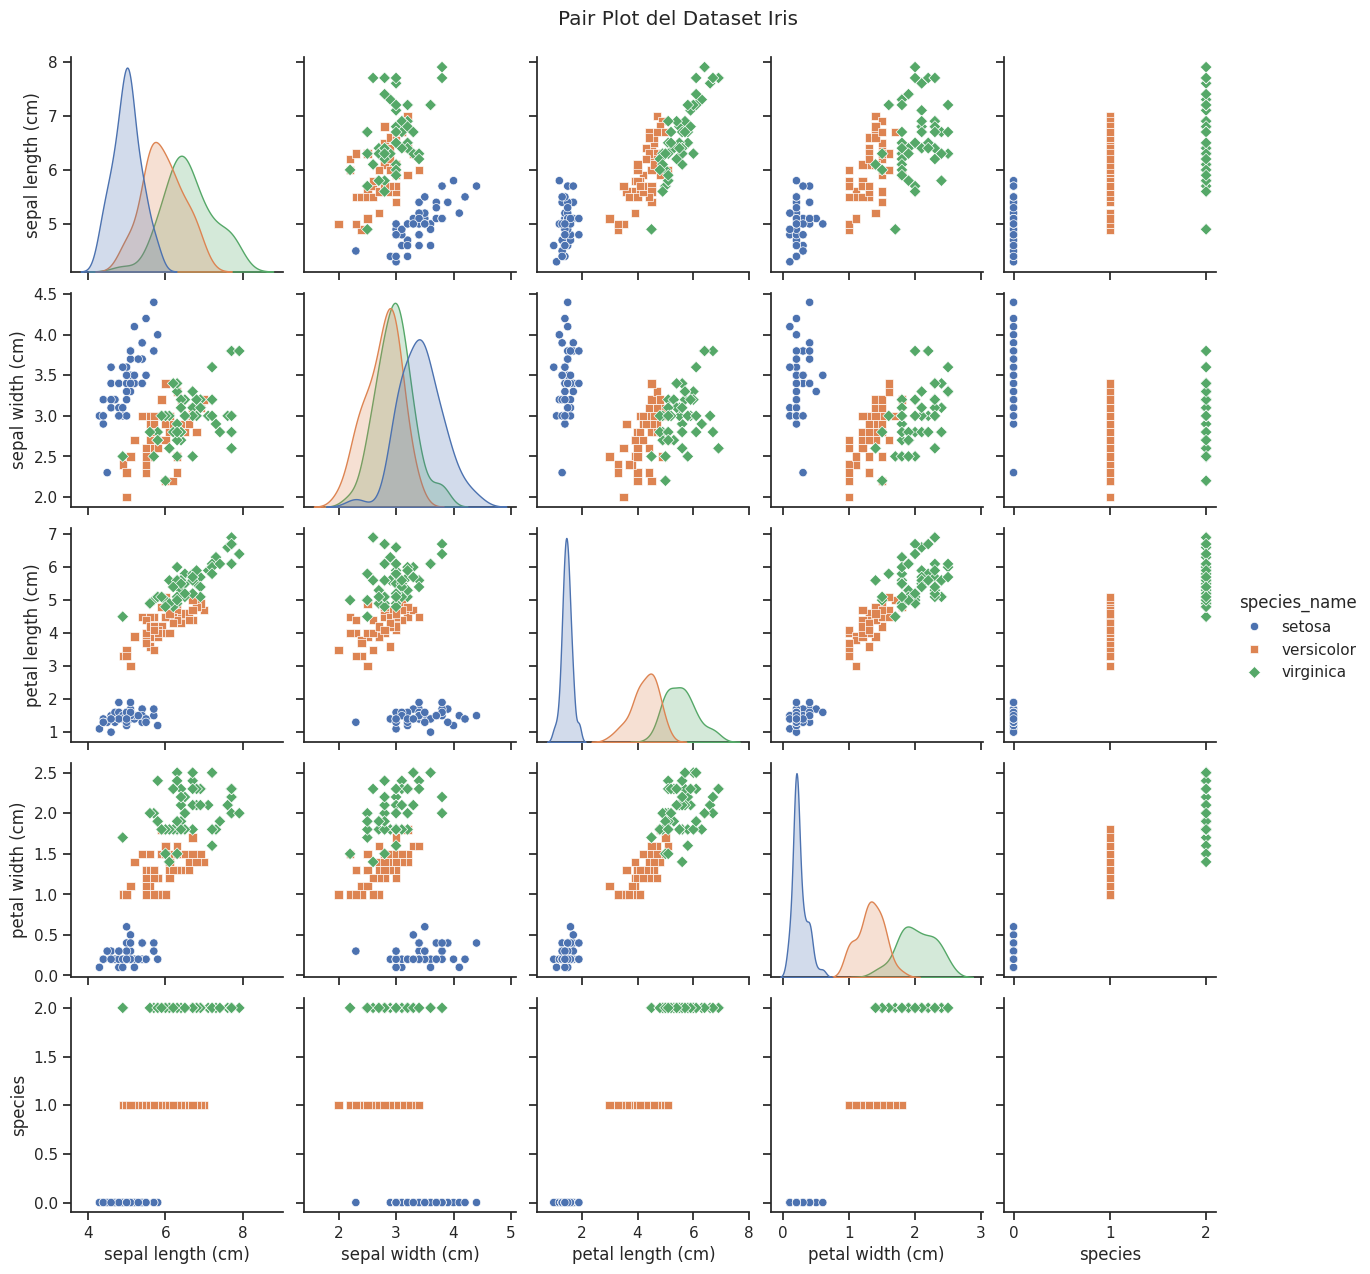

In [ ]:
# Visualización simple usando pairplot de Seaborn
sns.pairplot(iris_df, hue='species_name', markers=["o", "s", "D"])
plt.suptitle("Pair Plot del Dataset Iris", y=1.02)
plt.show()

## 4.3. Preparación de Datos

### a) Separar Features (X) y Target (y)

El modelo necesita saber qué columnas son las características de entrada (X) y cuál es la variable que queremos predecir (y).

In [ ]:
X = iris.data # Matriz de características (NumPy array)
y = iris.target # Vector de etiquetas (NumPy array)

print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)
print("\nPrimeras 5 filas de X:\n", X[:5])
print("\nPrimeras 5 etiquetas de y:", y[:5])

Dimensiones de X: (150, 4)
Dimensiones de y: (150,)

Primeras 5 filas de X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Primeras 5 etiquetas de y: [0 0 0 0 0]


### b) Dividir en Conjunto de Entrenamiento y Prueba (Train/Test Split)

Es fundamental dividir los datos en dos conjuntos:
* Entrenamiento (Train): Se usa para que el modelo aprenda los patrones.
* Prueba (Test): Se usa para evaluar el rendimiento del modelo en datos nunca antes vistos. Esto nos da una estimación de cómo generalizará el modelo a nuevos datos.
* Usamos `train_test_split`. Es común usar 70-80% para entrenamiento y 20-30% para prueba. El parámetro random_state asegura que la división sea la misma cada vez que ejecutamos el código (reproducibilidad). stratify=y es importante en clasificación para mantener la proporción original de clases en ambos conjuntos.

In [ ]:
# Dividir los datos: 80% para entrenamiento, 20% para prueba
# random_state para reproducibilidad
# stratify=y para mantener proporciones de clases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

# Verificar la estratificación (proporción de clases)
print("\nProporción de clases en y_train:")
print(np.bincount(y_train) / len(y_train))
print("\nProporción de clases en y_test:")
print(np.bincount(y_test) / len(y_test))

Dimensiones de X_train: (120, 4)
Dimensiones de X_test: (30, 4)
Dimensiones de y_train: (120,)
Dimensiones de y_test: (30,)

Proporción de clases en y_train:
[0.33333333 0.33333333 0.33333333]

Proporción de clases en y_test:
[0.33333333 0.33333333 0.33333333]


### c) Preprocesamiento: Escalado de Features

Muchos algoritmos de Machine Learning (como K-NN, SVM, Redes Neuronales y Regresión Logística con regularización) funcionan mejor o convergen más rápido cuando las características numéricas están en una escala similar.

* `StandardScaler` transforma los datos para que tengan media 0 y desviación estándar 1.

#### **¡Importante!**

1. Ajustamos (`fit`) el escalador solo con los datos de entrenamiento (`X_train`).
2. Luego, transformamos (transform) tanto los datos de entrenamiento como los de prueba con el escalador ya ajustado. Esto evita fuga de datos (data leakage) del conjunto de prueba al de entrenamiento.


In [ ]:
# Crear una instancia del escalador
scaler = StandardScaler()

#scaler.fit(X_train)
#X_train_scaled = transform(X_train)
# Ajustar el escalador CON SOLO los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba USANDO el escalador ya ajustado
X_test_scaled = scaler.transform(X_test)

print("Media de X_train antes de escalar:", X_train.mean(axis=0))
print("Desv. Est. de X_train antes de escalar:", X_train.std(axis=0))
print("\nMedia de X_train_scaled después de escalar:", X_train_scaled.mean(axis=0)) # Cercano a 0
print("Desv. Est. de X_train_scaled después de escalar:", X_train_scaled.std(axis=0)) # Cercano a 1

print("\nMedia de X_test_scaled después de escalar:", X_test_scaled.mean(axis=0)) # No será exactamente 0
print("Desv. Est. de X_test_scaled después de escalar:", X_test_scaled.std(axis=0)) # No será exactamente 1

Media de X_train antes de escalar: [5.84166667 3.04833333 3.77       1.205     ]
Desv. Est. de X_train antes de escalar: [0.837415   0.44665112 1.761136   0.75947899]

Media de X_train_scaled después de escalar: [-1.20829273e-15 -2.03679666e-15  4.99600361e-16  1.67458640e-15]
Desv. Est. de X_train_scaled después de escalar: [1. 1. 1. 1.]

Media de X_test_scaled después de escalar: [ 0.00995126  0.10074978 -0.03406892 -0.03730628]
Desv. Est. de X_test_scaled después de escalar: [0.92537075 0.84946558 0.99460651 1.00084962]


## 4.4. Elegir y Entrenar un Modelo

* Vamos a empezar con un modelo simple: K-Nearest Neighbors (K-NN).
* K-NN clasifica un punto basándose en la clase mayoritaria de sus 'k' vecinos más cercanos en el espacio de características.

In [ ]:
# Crear una instancia del clasificador K-NN
# n_neighbors=3 significa que considerará los 3 vecinos más cercanos
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos de entrenamiento ESCALADOS
knn.fit(X_train_scaled, y_train)

print("Modelo K-NN entrenado.")

Modelo K-NN entrenado.


### 4.5. Realizar Predicciones

Una vez entrenado, usamos el modelo para predecir las clases de los datos de prueba (que el modelo no ha visto).

In [ ]:
# Realizar predicciones sobre el conjunto de prueba escalado
y_pred_knn = knn.predict(X_test_scaled)

print("Primeras 10 predicciones:", y_pred_knn[:10])
print("Primeras 10 etiquetas reales:", y_test[:10])

Primeras 10 predicciones: [0 2 1 1 0 1 0 0 2 1]
Primeras 10 etiquetas reales: [0 2 1 1 0 1 0 0 2 1]


### 4.6. Evaluar el Modelo

¿Qué tan buenas son nuestras predicciones? Usamos métricas de evaluación.
### a) Accuracy (Precisión Global)

* Es la métrica más simple: proporción de predicciones correctas. Se puede calcular con `accuracy_score` o con el método `.score()` del modelo.

In [ ]:
# Calcular la accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy del K-NN (con accuracy_score): {accuracy_knn:.4f}")

# Calcular la accuracy usando el método .score() del modelo
# .score() para clasificadores devuelve la accuracy por defecto
score_knn = knn.score(X_test_scaled, y_test)
print(f"Accuracy del K-NN (con model.score()): {score_knn:.4f}")

Accuracy del K-NN (con accuracy_score): 0.9333
Accuracy del K-NN (con model.score()): 0.9333


### b) Matriz de Confusión

* Muestra cuántas veces el modelo confundió una clase con otra. Es muy útil para entender dónde se equivoca el modelo.
  * Filas: Clases verdaderas
  * Columnas: Clases predichas
  * Diagonal principal: Predicciones correctas


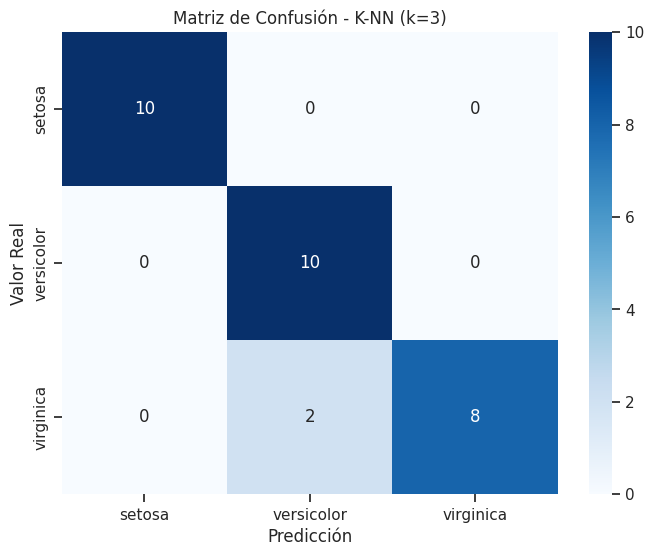


Matriz de Confusión (valores):
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


In [ ]:
# Calcular la matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - K-NN (k=3)')
plt.show()

print("\nMatriz de Confusión (valores):\n", cm_knn)

### c) Reporte de Clasificación

Proporciona métricas más detalladas por cada clase:

* Precision: De todas las predicciones para una clase, ¿cuántas fueron correctas? (TP / (TP + FP)) - Minimiza falsos positivos.
* Recall (Sensibilidad): De todas las instancias reales de una clase, ¿cuántas se predijeron correctamente? (TP / (TP + FN)) - Minimiza falsos negativos.
* F1-score: Media armónica de Precision y Recall. Buen balance entre ambas. (2 * (Precision * Recall) / (Precision + Recall))
* Support: Número de instancias reales de cada clase.

In [ ]:
# Generar el reporte de clasificación
report_knn = classification_report(y_test, y_pred_knn, target_names=iris.target_names)

print("\nReporte de Clasificación - K-NN (k=3):\n")
print(report_knn)


Reporte de Clasificación - K-NN (k=3):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



### 4.7. Probando otro Modelo: Regresión Logística

Lo lindo de Scikit-learn es que cambiar de modelo es muy fácil gracias a su API consistente. Probemos con `LogisticRegression`.

In [ ]:
# Crear una instancia del clasificador de Regresión Logística
# random_state para reproducibilidad si el solver es estocástico
log_reg = LogisticRegression(random_state=42, max_iter=200) # Aumentamos max_iter por si acaso

# Entrenar el modelo con los datos de entrenamiento ESCALADOS
log_reg.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluar el modelo
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=iris.target_names)

print(f"Accuracy de la Regresión Logística: {accuracy_log_reg:.4f}\n")
print("Matriz de Confusión - Regresión Logística:\n", cm_log_reg)
print("\nReporte de Clasificación - Regresión Logística:\n")
print(report_log_reg)

Accuracy de la Regresión Logística: 0.9333

Matriz de Confusión - Regresión Logística:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Reporte de Clasificación - Regresión Logística:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# 5. Pipelines: Encadenando Pasos

Realizar el escalado y el entrenamiento por separado puede ser propenso a errores (ej: olvidar escalar el test set, o peor, ajustar el scaler con el test set). Scikit-learn ofrece Pipeline para encadenar transformadores y un estimador final.
* Un Pipeline asegura que:
  1. Los pasos de preprocesamiento se ajustan (`fit`) solo con los datos de entrenamiento.
  2. Los datos de prueba (`X_test`) pasan por los mismos pasos de transformación (`transform`) antes de la predicción.
  3. Simplifica el código y reduce errores.

In [ ]:
# Crear un Pipeline que primero escala y luego aplica K-NN
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),           # Paso 1: Escalar datos
    ('knn', KNeighborsClassifier(n_neighbors=3)) # Paso 2: Clasificador K-NN
])

# Ahora, entrenamos el Pipeline COMPLETO con los datos ORIGINALES de entrenamiento
# El Pipeline se encarga internamente de escalar y luego entrenar
pipeline_knn.fit(X_train, y_train)

# Realizamos predicciones usando el Pipeline con los datos ORIGINALES de prueba
# El Pipeline aplica internamente el escalado (transform) y luego predice
y_pred_pipeline = pipeline_knn.predict(X_test)

# Evaluamos el Pipeline
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)
report_pipeline = classification_report(y_test, y_pred_pipeline, target_names=iris.target_names)

print(f"Accuracy del Pipeline (Scaler + K-NN): {accuracy_pipeline:.4f}\n")
print("Reporte de Clasificación - Pipeline (Scaler + K-NN):\n")
print(report_pipeline)

Accuracy del Pipeline (Scaler + K-NN): 0.9333

Reporte de Clasificación - Pipeline (Scaler + K-NN):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



# 6. Ejemplo Rápido: Regresión

Ahora, veamos un ejemplo de Regresión, donde queremos predecir un valor continuo. Usaremos el dataset **fetch_california_housing**.

## 6.1. Cargar y Preparar Datos

In [ ]:
# Cargar el dataset de precios de casas en California
california = fetch_california_housing()

# Crear DataFrame
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target # Target: Valor mediano de la casa (en $100,000s)

print("Primeras filas del dataset California Housing:")
print(california_df.head())

print("\nInformación del DataFrame:")
california_df.info()

# Separar Features (X) y Target (y)
X_reg = california.data
y_reg = california.target

# Dividir en entrenamiento y prueba
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print("\nDimensiones de los conjuntos de regresión:")
print("X_reg_train:", X_reg_train.shape, "y_reg_train:", y_reg_train.shape)
print("X_reg_test:", X_reg_test.shape, "y_reg_test:", y_reg_test.shape)

Primeras filas del dataset California Housing:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 

## 6.2. Crear un Pipeline para Regresión (Escalado + Modelo)

Usaremos LinearRegression como modelo.

In [ ]:
# Crear un Pipeline para regresión
pipeline_reg = Pipeline([
    ('scaler', StandardScaler()),      # Paso 1: Escalar
    ('regressor', LinearRegression())  # Paso 2: Modelo de Regresión Lineal
])

# Entrenar el pipeline
pipeline_reg.fit(X_reg_train, y_reg_train)

print("Pipeline de Regresión entrenado.")


Pipeline de Regresión entrenado.


## 6.3. Realizar Predicciones y Evaluar

Para regresión, usamos métricas diferentes:

* **Mean Squared Error (MSE)**: Error cuadrático medio. Penaliza más los errores grandes. Queremos que sea bajo.

* **R-squared (R²)**: Coeficiente de determinación. Proporción de la varianza en y que es predecible a partir de X. Va de -inf a 1. Un valor cercano a 1 es mejor. 0 significa que el modelo no es mejor que predecir siempre la media.

In [ ]:
# Realizar predicciones
y_reg_pred = pipeline_reg.predict(X_reg_test)

# Evaluar el modelo de regresión
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred) # También se puede usar pipeline_reg.score(X_reg_test, y_reg_test)

print(f"\nEvaluación del Modelo de Regresión Lineal:")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

# Comparar algunas predicciones con los valores reales
print("\nAlgunas predicciones vs valores reales:")
comparison_df = pd.DataFrame({'Real': y_reg_test[:10], 'Predicho': y_reg_pred[:10]})
print(comparison_df)


Evaluación del Modelo de Regresión Lineal:
Error Cuadrático Medio (MSE): 0.5559
Coeficiente de Determinación (R²): 0.5758

Algunas predicciones vs valores reales:
      Real  Predicho
0  0.47700  0.719123
1  0.45800  1.764017
2  5.00001  2.709659
3  2.18600  2.838926
4  2.78000  2.604657
5  1.58700  2.011754
6  1.98200  2.645500
7  1.57500  2.168755
8  3.40000  2.740746
9  4.46600  3.915615


##7. Manejo de Datos Faltantes y Categóricos

En datos reales, a menudo encontramos valores faltantes (NaN) y variables categóricas (texto). Scikit-learn tiene herramientas para manejarlos.

* `SimpleImputer`: Rellena valores faltantes (con la media, mediana, moda, o un valor constante).
* `OneHotEncoder`: Convierte variables categóricas en numéricas creando columnas "dummy" (0s y 1s).

* `ColumnTransformer` es útil para aplicar diferentes transformaciones a diferentes columnas (ej: escalar las numéricas, codificar las categóricas).

In [ ]:
# Crear un DataFrame de ejemplo con datos mixtos y faltantes
data_mixed = {'Numerica1': [1.0, 2.0, np.nan, 4.0, 5.0],
              'Numerica2': [10.0, 20.0, 30.0, 40.0, 50.0],
              'Categorica': ['A', 'B', 'A', 'C', 'B'],
              'Target': [0, 1, 0, 1, 0]}
df_mixed = pd.DataFrame(data_mixed)

print("DataFrame de ejemplo:")
df_mixed

DataFrame de ejemplo:


,Numerica1,Numerica2,Categorica,Target
0,1.0,10.0,A,0
1,2.0,20.0,B,1
2,NaN,30.0,A,0
3,4.0,40.0,C,1
4,5.0,50.0,B,0


In [ ]:
# Separar features y target
X_mixed = df_mixed.drop('Target', axis=1)
y_mixed = df_mixed['Target']

# Definir qué columnas son numéricas y cuáles categóricas
numeric_features = ['Numerica1', 'Numerica2']
categorical_features = ['Categorica']

In [ ]:
# Crear los transformadores para cada tipo de columna
# Para numéricas: Imputar NaNs con la media, luego escalar
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
# Para categóricas: Imputar NaNs con la moda (más frecuente), luego aplicar One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # handle_unknown='ignore' evita errores si aparecen categorías nuevas en test
])

In [ ]:
# Crear el ColumnTransformer para aplicar las transformaciones correctas a las columnas correctas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Por ahora, solo mostremos cómo funciona el preprocesador
X_mixed_processed = preprocessor.fit_transform(X_mixed)

In [ ]:
print("\nDataFrame original:")
print(X_mixed)
print("\nForma de los datos procesados:", X_mixed_processed.shape)
print("\nDatos procesados (array NumPy denso):\n", X_mixed_processed.toarray() if hasattr(X_mixed_processed, 'toarray') else X_mixed_processed)

# Nota: OneHotEncoder devuelve una matriz dispersa por defecto para eficiencia.
# El resultado muestra:
# Col 0: Numerica1 imputada y escalada
# Col 1: Numerica2 imputada y escalada
# Col 2, 3, 4: Categorica codificada (columnas para A, B, C respectivamente)


DataFrame original:
   Numerica1  Numerica2 Categorica
0        1.0       10.0          A
1        2.0       20.0          B
2        NaN       30.0          A
3        4.0       40.0          C
4        5.0       50.0          B

Forma de los datos procesados: (5, 5)

Datos procesados (array NumPy denso):
 [[-1.41421356 -1.41421356  1.          0.          0.        ]
 [-0.70710678 -0.70710678  0.          1.          0.        ]
 [ 0.          0.          1.          0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.          1.        ]
 [ 1.41421356  1.41421356  0.          1.          0.        ]]


In [ ]:
# Ahora, podríamos crear un Pipeline completo que incluya este preprocesador y un modelo
pipeline_full = Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression())])

In [ ]:
X_train_mixed, X_test_mixed, y_train_mixed, y_test_mixed = train_test_split(X_mixed, y_mixed, test_size=0.2, random_state=42)

In [ ]:
X_test_mixed.shape

(1, 3)

In [ ]:
pipeline_full.fit(X_train_mixed, y_train_mixed)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Numerica1', 'Numerica2']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Categorica'])])),
                ('classifier', LogisticRegression())])

In [ ]:
y_preds = pipeline_full.predict(X_test_mixed)

In [ ]:
y_preds

array([0])

In [ ]:
accuracy = accuracy_score(y_test_mixed, y_preds)

In [ ]:
accuracy

0.0

In [ ]:
y_test_mixed

,Target
1,1


In [ ]:
y_preds

array([0])